# Image Analysis

In [322]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [323]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-05-03 15:22:43,453 - INFO - methods.py - get_image_files - Found 9 images for case test_data
2023-05-03 15:22:43,454 - INFO - methods.py - make_histo - Already created histogramm for image 00000068_000000009518D5AE in folder png_cases
2023-05-03 15:22:43,503 - INFO - methods.py - segment_camera - Cam seed value: 13
2023-05-03 15:22:43,529 - INFO - methods.py - segment_camera - Insta seed value: 11
2023-05-03 15:22:43,599 - INFO - methods.py - segment_camera - Initial Camera Segmentation
2023-05-03 15:22:45,389 - INFO - methods.py - segment_camera - Limit: 20 delta = 1.0864164834873804
2023-05-03 15:22:45,630 - INFO - methods.py - segment_camera - Unique values cam [0 1]
2023-05-03 15:22:46,594 - INFO - methods.py - segment_instability - (1153, 1057, 3, 45)
2023-05-03 15:22:46,619 - INFO - methods.py - segment_instability - Insta Seeds : [(1203, 997), (1203, 1142), (1303, 976), (1303, 1181), (1378, 984), (1378, 1189)]
2023-05-03 15:22:46,670 - INFO - methods.py - segment_instabilit

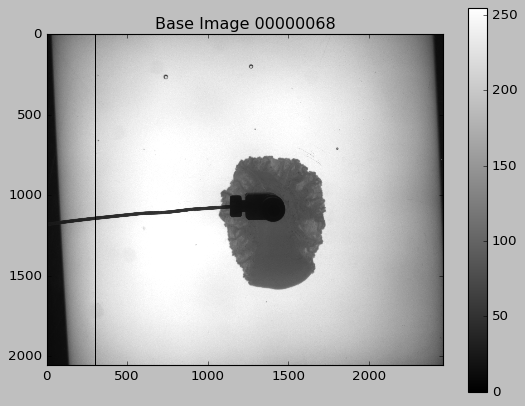

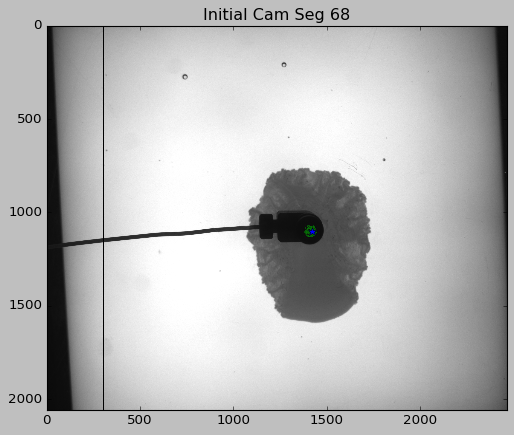

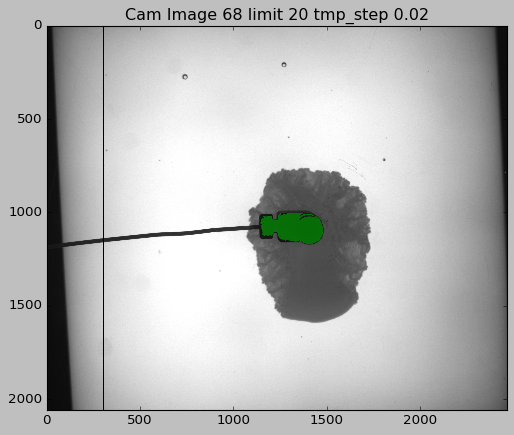

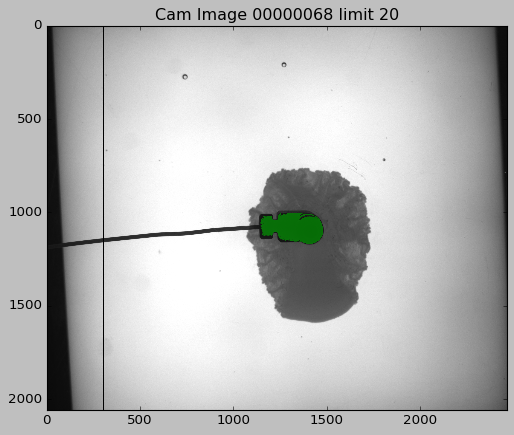

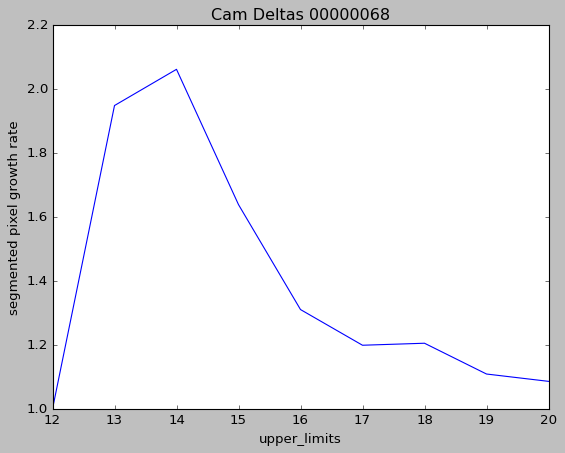

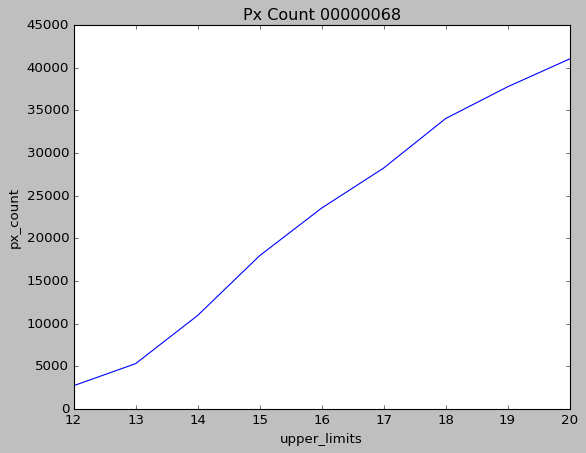

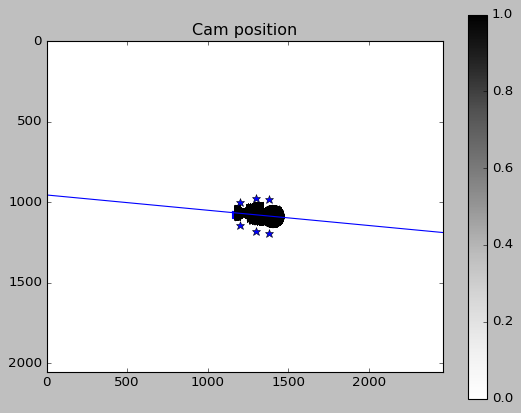

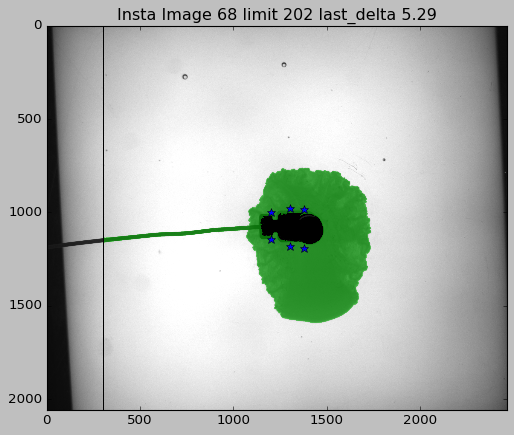

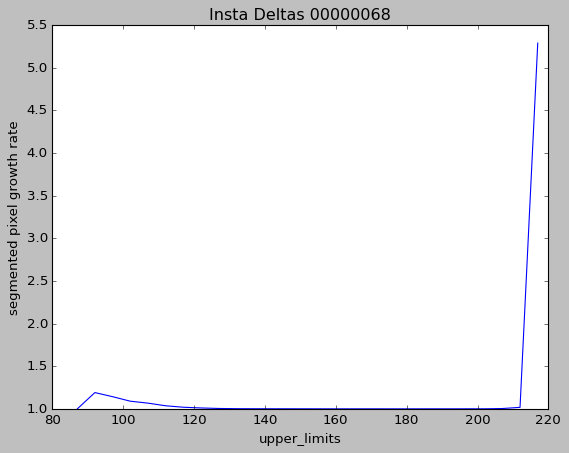

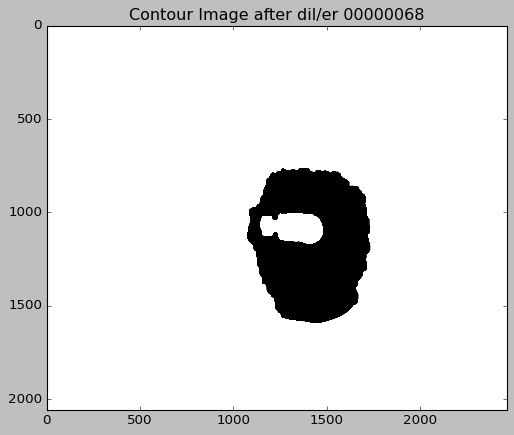

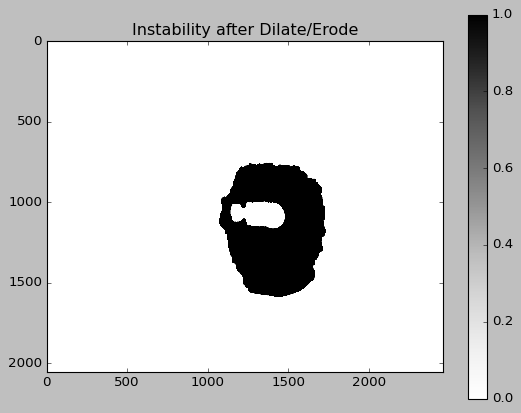

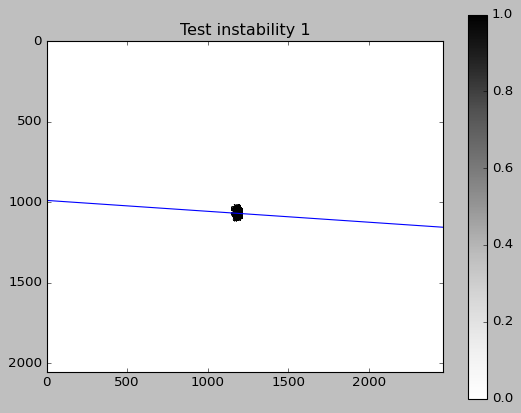

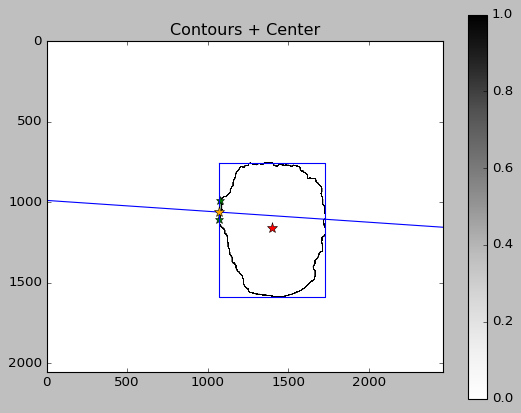

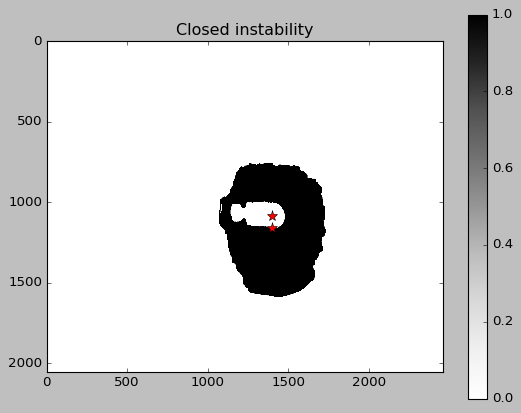

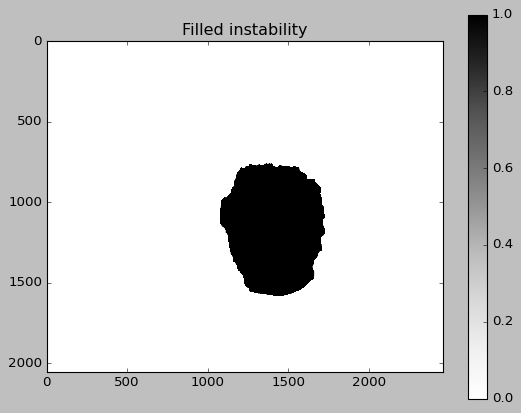

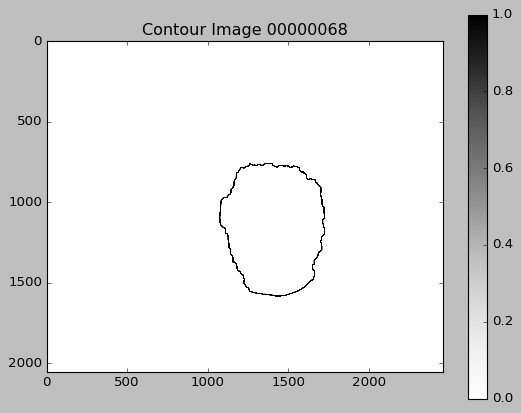

In [324]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:
    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas)